In [1]:
import re
import unicodedata
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

# تحميل مجموعة البيانات

In [2]:

data_df = pd.read_csv("dataset.csv", delimiter=',')
data_df.rename(columns={"target": "correct", "input": "error"}, inplace=True)


In [3]:
pd.options.display.max_colwidth = 600
data_df[:5]

,correct,error
0,Good luck on your new start !,Good luck on your new start !
1,My teacher is going to move to change his job .,My teacher is going to move to change his job .
2,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - 8 . .","Actually , who let me know about Lang - 8 was him ."


### حذف القيم المكررة والقيم الغير موجودة وعرض معلومات البيانات 

In [4]:
data_df = data_df.drop_duplicates()
data_df = data_df.dropna()
data_df.describe()

,correct,error
count,950746,950746
unique,937961,943959
top,Thank you for reading .,Nice to meet you .
freq,31,11


### عرض ال wordcloud للأعمدة التي تحتوي أخطاء و الصحيحة 


In [6]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def generate_wordcloud(words):


    stopwords = set(STOPWORDS)

    filtered_text = ' '.join([word for word in words.split() if word.lower() not in stopwords])

    wordcloud_no_stopwords = WordCloud(
        width=800,
        height=800,
        background_color='white',
        min_font_size=10
    ).generate(filtered_text)

    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud_no_stopwords)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()


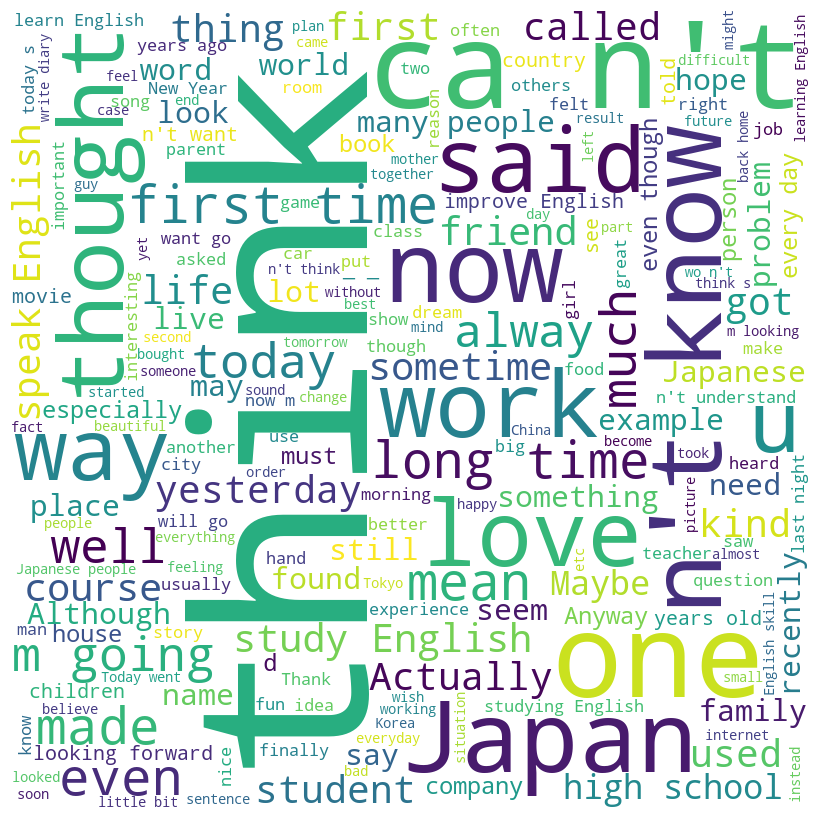

In [7]:
words = " ".join(data_df['correct'])
generate_wordcloud(words)

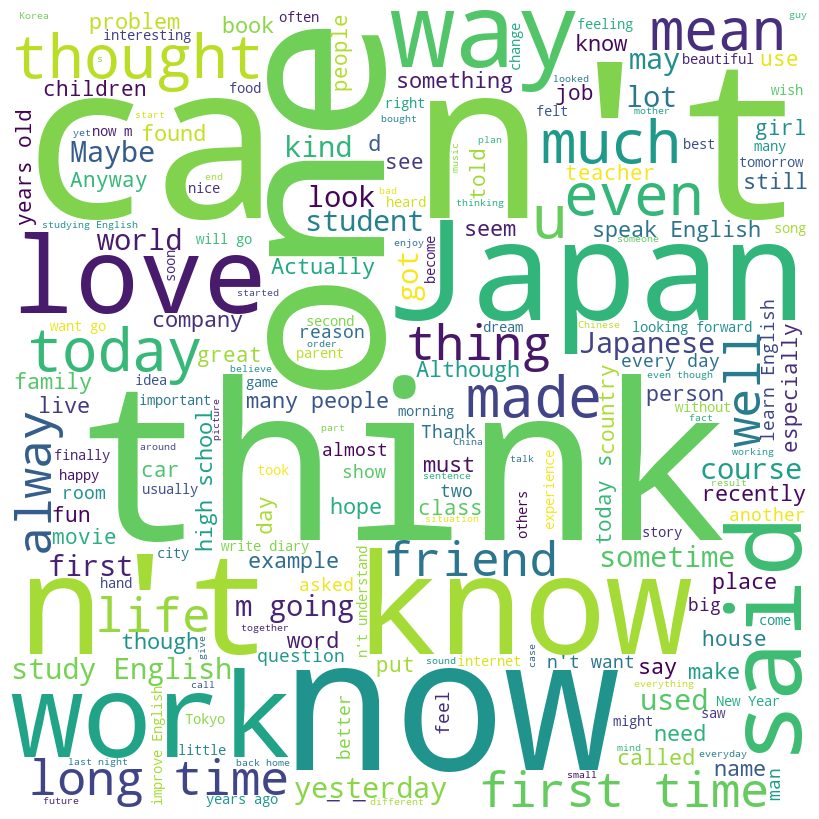

In [8]:
words = " ".join(data_df['error'])
generate_wordcloud(words)

##### لاحظنا منها الكثير من الكلمات المتشابهة ووجود الكثير من الكلمات المختصرة والاختصارات

### هنا نقوم برسم مخططات توضح أطوال الجمل الصحيحة والخاطئة 

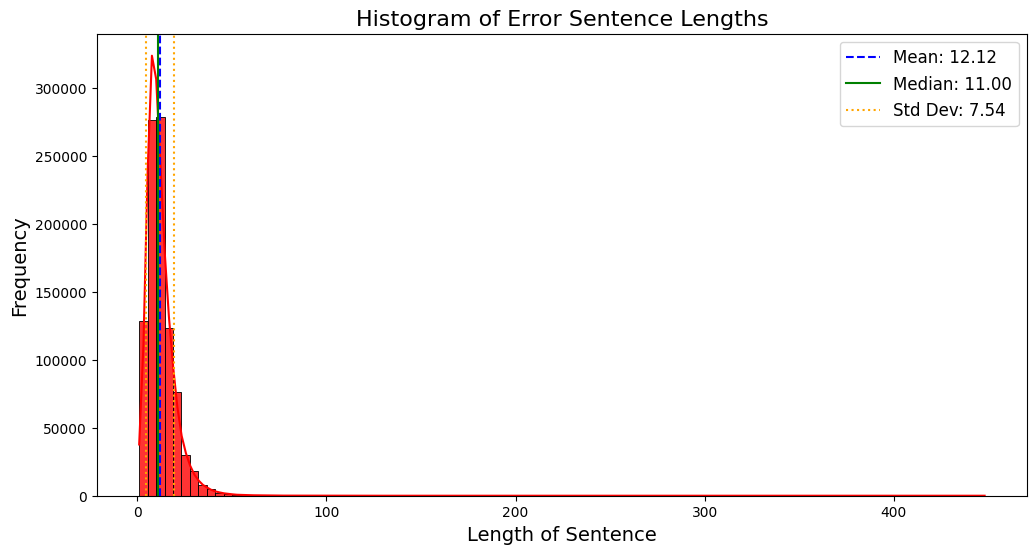

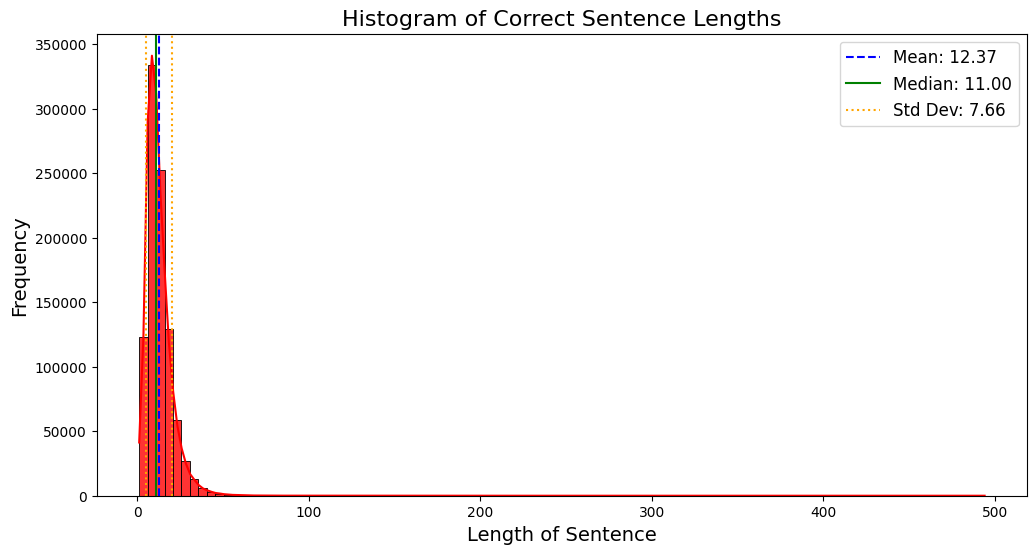

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_sentence_length_histogram(data, column, title):

    sentence_lengths = data[column].str.split().str.len()

    # حساب الإحصائيات الأساسية
    mean_length = np.mean(sentence_lengths)
    median_length = np.median(sentence_lengths)
    std_length = np.std(sentence_lengths)

    plt.style.use("default")

    plt.figure(figsize=(12, 6))
    sns.histplot(sentence_lengths, bins=100, color="red", kde=True, alpha=0.8)

    # إضافة خطوط للإحصائيات الأساسية
    plt.axvline(
        mean_length, color="blue", linestyle="--", label=f"Mean: {mean_length:.2f}"
    )
    plt.axvline(
        median_length,
        color="green",
        linestyle="-",
        label=f"Median: {median_length:.2f}",
    )
    plt.axvline(
        mean_length + std_length,
        color="orange",
        linestyle=":",
        label=f"Std Dev: {std_length:.2f}",
    )
    plt.axvline(mean_length - std_length, color="orange", linestyle=":")

    plt.title(f"Histogram of {title} Sentence Lengths", fontsize=16)
    plt.xlabel("Length of Sentence", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.tick_params(colors="black")
    plt.legend(fontsize=12)

    plt.show()


plot_sentence_length_histogram(data_df, "error", "Error")
plot_sentence_length_histogram(data_df, "correct", "Correct")

##### لاحظنا منها ان معظم الجمل تحتوي على عدد قليل من الكلمات (10-15 كلمة) والأطوال التي تتجاوز 50 كلمة نادرة جدًا هذا يعني أن التوزيع غير متماثل ويميل نحو الجمل القصيرة

### هذا التابع يقوم بعرض أكثر n كلمة تكرارا في البيانات لدينا

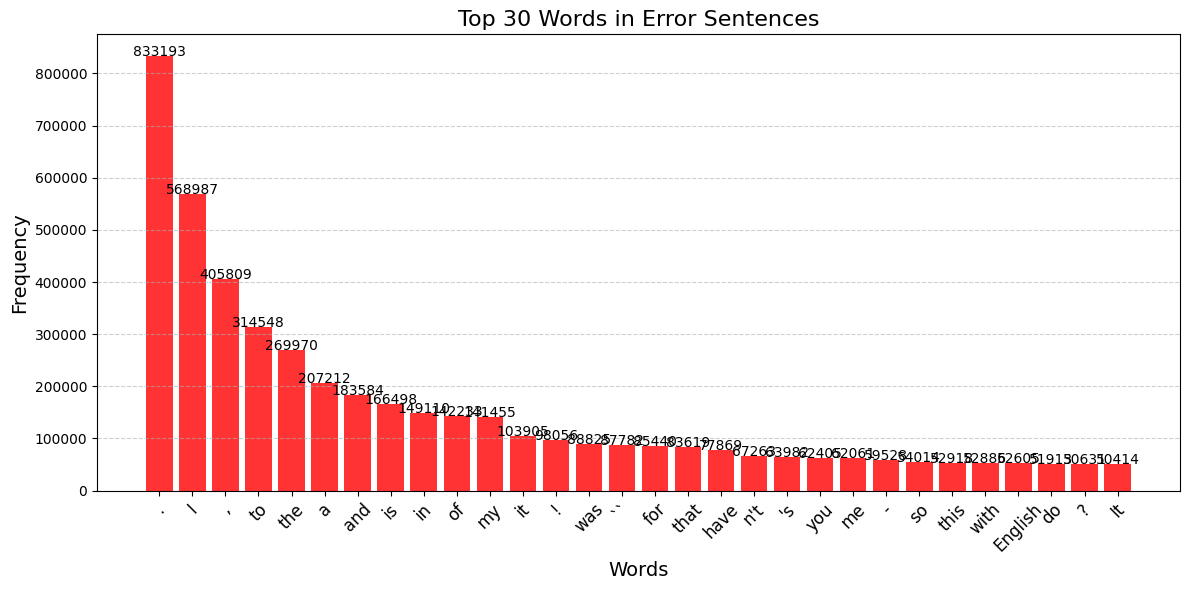

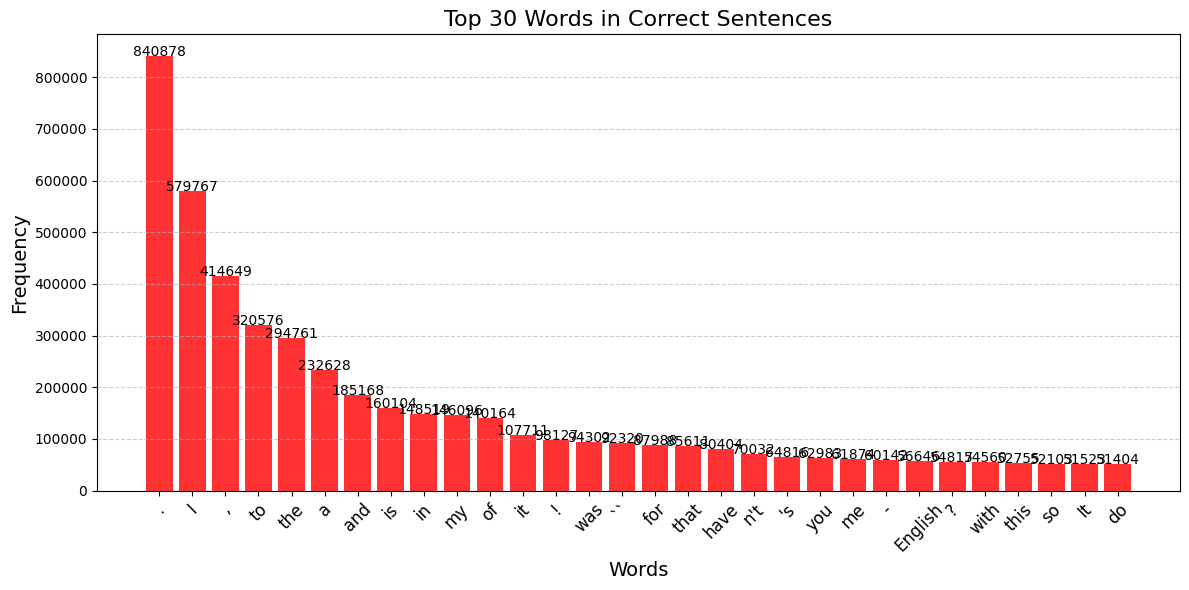

In [22]:
from collections import Counter
import matplotlib.pyplot as plt


def plot_top_n_words(text, title, n=30):

    words = text.split()
    counter = Counter(words)
    most_common = counter.most_common(n)
    words, counts = zip(*most_common)

    plt.figure(figsize=(12, 6))
    bars = plt.bar(words, counts, color="red", alpha=0.8)
    plt.title(f"Top {n} Words in {title}", fontsize=16)
    plt.xticks(rotation=45, fontsize=12)
    plt.ylabel("Frequency", fontsize=14)
    plt.xlabel("Words", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.6)  # خطوط شبكية للمحور العمودي

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height + 5,
            f"{int(height)}",
            ha="center",
            fontsize=10,
        )

    plt.tight_layout()
    plt.show()


error_text = " ".join(data_df["error"])
correct_text = " ".join(data_df["correct"])


plot_top_n_words(error_text, "Error Sentences")
plot_top_n_words(correct_text, "Correct Sentences")

#### فوجدا الكثير من علامات الترقيم والكلمات المختصرة

### هذا التابع استعملناه لرسم مخطط يوضح عدد الكلمات الفريدة في الجمل المصححة والخاطئة

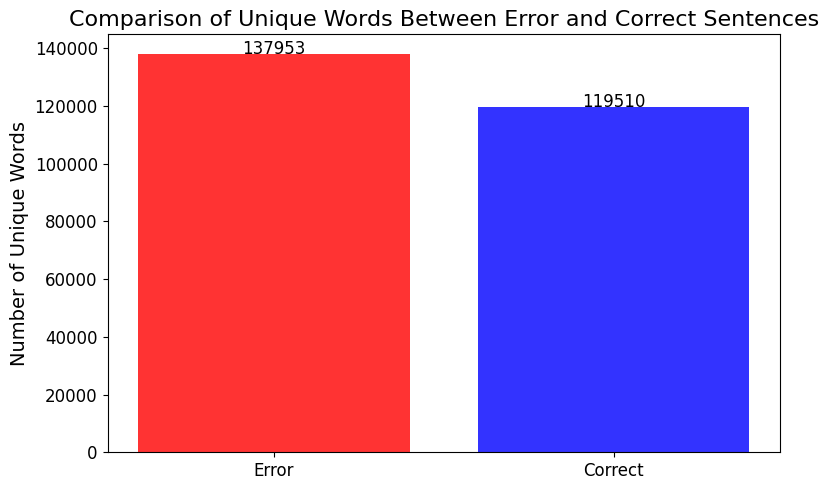

In [23]:
unique_words_error = len(set(error_text.split()))
unique_words_correct = len(set(correct_text.split()))


plt.figure(figsize=(8, 5))
bars = plt.bar(
    ["Error", "Correct"],
    [unique_words_error, unique_words_correct],
    color=["red", "blue"],
    alpha=0.8,
)


plt.title("Comparison of Unique Words Between Error and Correct Sentences", fontsize=16)
plt.ylabel("Number of Unique Words", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 200,
        f"{int(height)}",
        ha="center",
        fontsize=12,
    )


plt.tight_layout()
plt.show()

#### كما نلاحظ هنا وجود كلمات مميزة أكثر في الجمل الخاطئة وهذا منطقي تبعاً لوجود الأخطاء

### نقوم بهذا التابع بوضع قيمة nan  في الحقول التي طولها أقل من 5 وأكثر من 15  لحصر التدريب على طول بيانات ثابت

In [144]:
import numpy as np

for i, row in enumerate(data_df["error"]):
    if (
       len(row.split(" ")) >= 15
        or len(row.split(" ")) <= 5
    ):
        data_df.iloc[i] = np.nan

In [145]:
data_df = data_df.dropna()
data_df.isna().any()
data_df.describe()

,correct,error
count,290261,290261
unique,288198,289553
top,This is my first diary entry .,This is my first writing .
freq,20,5


### مجموعة التوابع مختلفة لتنظيف النص

In [146]:
import unicodedata
import re

# نقوم باستبدال الإختصارات الى شكلها الأصلي
def decontracted(phrase):
    contractions = {
        r"won't": "will not",
        r"can't": "can not",
        r"n't": " not",
        r"gon na": " going to",
        r"wan na": " want to",
        r"gonna": " going to",
        r"wanna": " want to",
        r"'re": " are",
        r"'s": " is",
        r"'d": " would",
        r"'ll": " will",
        r"'t": " not",
        r"'ve": " have",
        r"'m": " am",
    }
    for pattern, replacement in contractions.items():
        phrase = re.sub(pattern, replacement, phrase)
    return phrase

# هون نقوم بحذذف الرموز التعبيرية
def remove_emoticons(text):

    emoticons = [r"xD", r":D", r":P", r"x D", r": D", r": P"]
    for emoticon in emoticons:
        text = re.sub(emoticon, "", text)
    return text


def clean_text(text):
    # إزالة الأحرف المشكلة وتحويل النص إلى ascii
    text = unicodedata.normalize("NFKD", text).encode("ascii", "ignore").decode("ascii")

    text = decontracted(text)

    text = remove_emoticons(text) 
    # هون عم نحذف الكلام الموجود ضمن الأقواس مع الأقواس نفسها
    if "(" in text and ")" in text:
        try:
            text = re.sub(r"\([^)]*\)", "", text)
        except Exception:
            pass
    # هون عم نعمل تنظيف للنصوص من خلال سلسلة من التعبيرات لضمان تنسيق متناسق
    text = re.sub(r"[^A-Za-z;!?.,\'\-\s]+", " ", text)
    text = re.sub(r"\.+", r" .", text)
    text = re.sub(r"\;+", r" , ", text)
    text = re.sub(r"!+", r" !", text)
    text = re.sub(r"\?+", r" ?", text)
    text = re.sub(r"\-+", r" - ", text)
    text = re.sub(r"\,+", r" , ", text)
    text = re.sub(r"\'+", r" ' ", text)
    text = re.sub(" +", " ", text)

    return text.strip()

In [147]:
data_df['correct'] = data_df['correct'].apply(clean_text)
data_df['error'] = data_df['error'].apply(clean_text)

In [148]:
data_df[:5]

,correct,error
3,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
4,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him ."
6,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .
11,I heard a sentence last night when I was watching TV .,I heard a sentence last night when I watched TV .
15,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back ."


In [149]:
data_df = data_df.drop_duplicates()
data_df = data_df.dropna()
data_df.describe()

,correct,error
count,289554,289554
unique,286866,288705
top,,
freq,81,32


In [150]:
data_df.to_csv('cleaned.csv', index = False)

In [151]:
data_df = pd.read_csv('cleaned.csv')

### استخراج الكلمات الخاطئة الموجودة في عمود الأخطااء التي لا توجد في عمود التصحيح لكل صف

In [154]:
import pandas as pd
import nltk
nltk.download('punkt')

def get_errors(row):
    error_tokens = nltk.word_tokenize(row['error'])
    correct_tokens = nltk.word_tokenize(row['correct'])
    return [word for word in error_tokens if word not in correct_tokens]

data_df['identified_errors'] = data_df.apply(get_errors, axis=1)

error_frequency = data_df['identified_errors'].explode().value_counts()

print(error_frequency.head(10))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


identified_errors
the    13223
is     12359
a      11652
to     11077
in      8751
,       8724
of      8121
.       7023
it      5633
for     5471
Name: count, dtype: int64


In [155]:
data_df.head(2)

,correct,error,identified_errors
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .,[subject]
1,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him .",[him]


In [156]:
data_df.to_csv('cleaned2.csv', index = False)

# Encoder-Decoder using LSTM with Attention

In [160]:
import re
import datetime
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import keras
import tensorflow as tf
from sklearn.metrics import fbeta_score
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard
from keras.layers import Embedding,LSTM, TimeDistributed, Dense, Bidirectional
from keras.initializers import HeNormal, GlorotNormal, GlorotUniform
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import matplotlib.pyplot as plt

In [161]:
data = pd.read_csv('cleaned2.csv')

In [162]:
data.head(2)

,correct,error,identified_errors
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .,['subject']
1,"Actually , he was the one who let me know about Lang - . .","Actually , who let me know about Lang - was him .",['him']


### دالة تقوم بمعالجة النصوص لإضافة رموز بداية (`<start>`) ونهاية (`<end>`) بناءً على الخيارات المحددة
##### طبعاً رمز البداية `<start>` يساعد النموذج في التعرف على بداية النص
##### و رمز النهاية `<end>` يحدد نهاية النص، لحتى يساعد في مهام مثل التصحيح، الترجمة، تلخيص النصوص، أو التنبؤ بالجمل

In [163]:
def preprocess(t, add_start_token, add_end_token):

  if add_start_token == True and add_end_token == False:
    t = '<start>'+' '+t
  if add_start_token == False and add_end_token == True:
    t = t+' '+'<end>'
  if add_start_token == True and add_end_token == True:
    t = '<start>'+' '+t+' '+'<end>'

  t = re.sub(' +', ' ', t)
  return t

In [164]:
encoder_input = [
    preprocess(line, add_start_token=True, add_end_token=True) for line in data["error"]
]
decoder_input = [
    preprocess(line, add_start_token=True, add_end_token=False)
    for line in data["correct"]
]
decoder_output = [
    preprocess(line, add_start_token=False, add_end_token=True)
    for line in data["correct"]
]

In [165]:
encoder_input[:2]

['<start> And he took in my favorite subject like soccer . <end>',
 '<start> Actually , who let me know about Lang - was him . <end>']

In [166]:
decoder_input[:2]

['<start> And he took in my favorite subjects like soccer .',
 '<start> Actually , he was the one who let me know about Lang - . .']

In [167]:
decoder_output[:2]

['And he took in my favorite subjects like soccer . <end>',
 'Actually , he was the one who let me know about Lang - . . <end>']

### تجهيز المدخلات للنموذج

In [168]:
tokenizer = Tokenizer(filters="", split=" ")
# نقوم بتدريب ال tokenizer على البيانات الموجودة لدينا
tokenizer.fit_on_texts(encoder_input)
# نقوم بالحصول على قاموس الكلمات 
word_index = tokenizer.word_index

# نقوم بالحصول على اكبر قيمة لطول السطر من بين السطور 
max_length = max([len(row.split(" ")) for row in encoder_input])
INPUT_ENCODER_LENGTH = max_length

# تحويل الكلمات لتسلسلات رقمية
enc_input_encoded = tokenizer.texts_to_sequences(encoder_input)

# نقوم باضافة padding أصفار الى نهاية الجمل التي يقل طولها عن الطول المحدد
enc_input_padded = pad_sequences(
    enc_input_encoded, maxlen=INPUT_ENCODER_LENGTH, padding="post"
)

print(enc_input_padded.shape)

(287054, 17)


In [169]:
decoder_data = decoder_input.copy()
decoder_data.extend(decoder_output)

out_tokenizer = Tokenizer(filters='', split=" ")
out_tokenizer.fit_on_texts(decoder_data)
word_index = out_tokenizer.word_index

max_length = max([ len(row.split(" ")) for row in decoder_input ])
INPUT_DECODER_LENGTH = max_length

In [170]:
dec_input_encoded = out_tokenizer.texts_to_sequences(decoder_input)
dec_input_padded = pad_sequences(
    dec_input_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating="post"
)

print(dec_input_padded.shape)

(287054, 29)


In [171]:
print(decoder_input[0])
print(dec_input_padded[0])

<start> And he took in my favorite subjects like soccer .
[   3   12   46  178   13   10  266 1478   41  612    1    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0]


In [172]:
dec_output_encoded = out_tokenizer.texts_to_sequences(decoder_output)
dec_output_padded = pad_sequences(
    dec_output_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating="post"
)

print(dec_output_padded.shape)

(287054, 29)


In [173]:
from nltk.tokenize import WhitespaceTokenizer
import numpy as np
import io


tokenizer = WhitespaceTokenizer()


def load_vectors(fname):
    fin = io.open(fname, "r", encoding="utf-8", newline="\n", errors="ignore")
    n, d = map(int, fin.readline().split())  # قراءة عدد الكلمات وأبعاد المتجهات
    data = {}
    for line in fin:
        tokens = tokenizer.tokenize(
            line.rstrip()
        )  # تقسيم النص باستخدام WhitespaceTokenizer
        word = tokens[0]  # الكلمة
        vector = np.asarray(tokens[1:], dtype=float)  # المتجه الخاص بالكلمة
        data[word] = vector
    return data

In [174]:
embedding_index = load_vectors('wiki-news-300d-1M.vec')

### إنشاء ال embedding_matrix

In [233]:
word_index = tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save("input_embedding.npy", embedding_matrix)

Converted 31870 words (20333 misses)


In [234]:
word_index = out_tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save("output_embedding.npy", embedding_matrix)

Converted 28632 words (11263 misses)


In [236]:
in_embedding_matrix = np.load("input_embedding.npy")
out_embedding_matrix = np.load("output_embedding.npy")
print(in_embedding_matrix.shape, out_embedding_matrix.shape)

(52205, 300) (39897, 300)


### الكود لايعود لنا :)  لقد بحثنا عن تنفيذ للورقة البحثية الذكورة بالتقرير , نتمنى ان ينال التنفيذ والنتيحة اعجابكم مع كامل الشكر , الطلاب


#### نشكر وقتكم وكل ما قدمتوه

### ال Encoder

In [237]:
class Encoder(tf.keras.Model):

    def __init__(self, inp_vocab_size, embedding_size, lstm_size, input_length):

        super().__init__()
        
        self.vocab_size = inp_vocab_size

        self.embedding_size = embedding_size
        # تحديد عدد الوحدات المخفية في طبقة LSTM
        self.lstm_units = lstm_size
        # طول تسلسل النصوص المدخلة
        self.input_length = input_length


    def build(self, input_sequence):
        #  تأخذ الكلمات التي الممثلة بارقام وتحوّلها إلى متجهات عددية ذات 300 بعد 
        self.embedding = Embedding(

            input_dim=self.vocab_size,

            output_dim=self.embedding_size,

            input_length=self.input_length,
            # يتم تحميل مصفوفة التضمين التي اعديناها سابقاً
            weights=[in_embedding_matrix],
            # نقوم بتجاهل لكل القيم الصفرية وقت المعالجة
            mask_zero=True,
            # يعني أن القيم في مصفوفة التضمين لن تتغير أثناء تدريب النموذج
            trainable=False,

            name="embedding_layer_encoder",

        )
        # Long Short Term Memory نوع من ال RNN
        self.lstm = LSTM(
            # عدد الوحدات المخفية طبعاً كل ما زودنا العدد كل ما زادت قدرة النموذج على تعلم الأنماط المعقدة
            self.lstm_units,
            # يتم إرجاع الحالتين hidden state و cell state عند نهاية التسلسل
            return_state=True,
            # لترجع مخرجات كل خطوة زمنية في التسلسل هاد الشي بفيدنا بطبقة ال attention
            return_sequences=True,

            name="Encoder_LSTM",

        )


    def call(self, input_sequence, states):

        input_embedding = self.embedding(input_sequence)

        self.lstm_output, self.state_h, self.state_c = self.lstm(
            input_embedding, initial_state=states

        )

        return self.lstm_output, self.state_h, self.state_c


    def initialize_states(self, batch_size):


        lstm_state_h = tf.zeros(

            (batch_size, self.lstm_units),

            dtype=tf.dtypes.float32,

            name="Encoder_LSTM_hidden_state",

        )

        lstm_state_c = tf.zeros(

            (batch_size, self.lstm_units),

            dtype=tf.dtypes.float32,

            name="Encoder_LSTM_cell_state",

        )


        return lstm_state_h, lstm_state_c

#### حساب الجداء السلمي dot product بين Encoder Output  و Decoder Hidden State

In [238]:
def dot_func(encoder_output, decoder_hidden_state):
    decoder_hidden_state = tf.reshape(
        decoder_hidden_state,
        [decoder_hidden_state.shape[0], 1, decoder_hidden_state.shape[1]],
    )
    dot_product = tf.matmul(encoder_output, decoder_hidden_state, transpose_b=True)
    return dot_product

### Attention Mechanism

In [ ]:
#  لتحسين التركيز على الأجزاء المهمة فيال Encoder Output
class Attention(tf.keras.layers.Layer):

    def __init__(self, scoring_function, att_units):
        super().__init__()
        # نوع التابع المستخدم في مثالنا استعملنا dot Attention بدلا عن Bahdanau Attention الموجود في الورقة البحثية
        self.scoring_function = scoring_function
        self.att_units = att_units
        self.timesteps = 0

    def build(self, data_shape):
        # تعريف حجم البيانات المدخلة
        self.encoder_units = data_shape[1]

    def call(self, decoder_hidden_state, encoder_output):
        # اختيار طريقة القياس , عساس عنا اكتر من وحدة ^_^
        if self.scoring_function == "dot":
            # يتم تطبيق دالة Softmax للحصول على توزيع احتمالي للأوزان
            # تشير إلى مدى أهمية كل خطوة زمنية في مخرجات المشفر بالنسبة للحالة المخفية للمفكك
            alpha_ = tf.nn.softmax( 
                dot_func(encoder_output, decoder_hidden_state), axis=1
            )
            c_t = sum(
                [# نحسب المخرجات الموزونة لكل خطوة زمنية اي يعني أنو عم نركز على الخطوات المهمة ونتجاهل غير المهمة
                    alpha_[ # يشير إلى مدى أهمية هذه الخطوة بالنسبة للحالة المخفية للمفكك
                        :,
                        i,
                    ]
                    * encoder_output[:, i, :] # متجه المخرجات الخاص بالخطوة الزمنية i
                    for i in range(alpha_.shape[1])
                ]
            )
            # c_T
            # متجه يمثل المعلومات الملخصة للنص الأصلي التي يحتاجها المفكك لتوليد الكلمة التالية
            c_t = tf.convert_to_tensor(c_t, dtype=tf.float32)
            return c_t, alpha_

### Decoder

In [ ]:
# مسؤول عن معالجة خطوة واحدة فقط من تسلسل البيانات في الـ Decoder
# اي نقوم باستدعاءه من أجل كل كلمة ضمن السلسلة التي نعمل عليها

# في البداية نمرر البيانات الى ال LSTM  لتوليد المخرجات 
# ثم نقوم بتحويلها الى predicts من هلال  dense layer

class One_Step_Decoder(tf.keras.Model):

    def __init__(
        self,

        tar_vocab_size,

        embedding_dim,

        input_length,
        dec_units,
        score_fun,
        att_units,

    ):

        super().__init__()

        self.dec_units = dec_units
        self.att_units = att_units

        self.tar_vocab_size = tar_vocab_size

        self.embedding_dim = embedding_dim

        self.input_length = input_length
        self.score_fun = score_fun

        self.dense = Dense(self.tar_vocab_size)


    def build(self, input):

        self.embedding = Embedding(

            input_dim=self.tar_vocab_size,

            output_dim=self.embedding_dim,

            input_length=self.input_length,

            weights=[out_embedding_matrix],

            mask_zero=True,

            trainable=False,

            name="embedding_layer_decoder",

        )

        self.lstm = LSTM(
            self.dec_units,

            return_state=True,

            return_sequences=True,

            name="One_step_decoder_LSTM",

        )


    def call(self, input_to_decoder, encoder_output, state_h, state_c):


        input_embedding = self.embedding(input_to_decoder)


        if self.score_fun == "dot":

            attention = Attention("dot", self.att_units)

            context_vector, attention_weights = attention(state_h, encoder_output)


        out = tf.concat(

            [input_embedding, tf.expand_dims(context_vector, axis=1)], axis=2

        )


        self.lstm_output, self.state_h, self.state_c = self.lstm(

            out, initial_state=[state_h, state_c]

        )

        result_out = self.dense(self.lstm_output)


        return (

            tf.squeeze(result_out),

            self.state_h,
            self.state_c,

            attention_weights,

            context_vector,

        )

In [243]:
class Decoder(tf.keras.Model):
    def __init__(
        self,
        out_vocab_size,
        embedding_dim,
        input_length,
        dec_units,
        score_fun,
        att_units,
    ):
        super().__init__()
        self.dec_units = dec_units
        self.att_units = att_units
        self.out_vocab_size = out_vocab_size
        self.embedding_dim = embedding_dim
        self.input_length = input_length
        self.score_fun = score_fun
        self.one_step_decoder = One_Step_Decoder(
            self.out_vocab_size,
            self.embedding_dim,
            self.input_length,
            self.dec_units,
            self.score_fun,
            self.att_units,
        )

    def call(
        self, input_to_decoder, encoder_output, decoder_hidden_state, decoder_cell_state
    ):
        out_array = tf.TensorArray(
            tf.float32, size=input_to_decoder.shape[1], name="out_array"
        )

        for timestep in range(input_to_decoder.shape[1]):
            (
                output,
                decoder_hidden_state,
                decoder_cell_state,
                attention_weights,
                context_vector,
            ) = self.one_step_decoder(
                input_to_decoder[:, timestep : timestep + 1],
                encoder_output,
                decoder_hidden_state,
                decoder_cell_state,
            )

            out_array = out_array.write(timestep, output)

        out_array = tf.transpose(out_array.stack(), [1, 0, 2])
        return out_array

In [ ]:
INPUT_VOCAB_SIZE = len(list(tokenizer.word_index)) + 2
OUTPUT_VOCAB_SIZE = len(list(out_tokenizer.word_index)) + 2
BATCH_SIZE = 16


In [245]:
class seqTseq(tf.keras.Model):
    def __init__(self, enc_units, dec_units, scoring_func, att_units):
        super().__init__()
        self.scoring_func = scoring_func
        self.att_units = att_units
        self.dec_units = dec_units
        self.enc_units = enc_units
        self.encoder = Encoder(
            INPUT_VOCAB_SIZE,
            embedding_size=300,
            lstm_size=self.enc_units,
            input_length=INPUT_ENCODER_LENGTH,
        )
        self.decoder = Decoder(
            OUTPUT_VOCAB_SIZE,
            embedding_dim=300,
            input_length=None,
            dec_units=self.dec_units,
            score_fun=self.scoring_func,
            att_units=self.att_units,
        )

    def call(self, data):

        input, output = data[0], data[1]
        states = self.encoder.initialize_states(input.shape[0])
        encoder_output, encoder_final_state_h, encoder_final_state_c = self.encoder(
            input, states
        )
        decoder_output = self.decoder(
            output, encoder_output, encoder_final_state_h, encoder_final_state_c
        )

        return decoder_output

#### SparseCategoricalCrossentropy
##### نستعمله لأنه مناسب لتصنيف متعدد الفئات عندما تكون القيم الحقيقية عبارة عن أرقام

In [246]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none'
)

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

#### إعداد بيانات الإدخال والإخراج

In [247]:
tf.random.set_seed(32)

encoder_input_datatset = tf.data.Dataset.from_tensor_slices(enc_input_padded[:10000])
decoder_input_datatset = tf.data.Dataset.from_tensor_slices(dec_input_padded[:10000])
decoder_output_datatset = tf.data.Dataset.from_tensor_slices(dec_output_padded[:10000])
# مجموعات التدريب ولااختبار
full_dataset =  tf.data.Dataset.zip( ((encoder_input_datatset, decoder_input_datatset), decoder_output_datatset) ).shuffle(1000)
test_dataset = full_dataset.take(50).batch(32)
train_dataset = full_dataset.skip(50).batch(32)

print(train_dataset, test_dataset)

<BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))> <BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))>


In [248]:
train_dataset

<BatchDataset element_spec=((TensorSpec(shape=(None, 17), dtype=tf.int32, name=None), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None)), TensorSpec(shape=(None, 29), dtype=tf.int32, name=None))>

### Callbacks Functions

In [250]:
def scheduler(epoch, lr):
    if (
        epoch < 1
    ):  # إضا كان معدل الرقم اقل من واحد يبقى معدل التعلم كما و والا يتم تقليله بشكل اسي
        return lr
    else:
        return lr * tf.math.exp(-0.1)


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

# بشكل مختصر اذا لم يتحسن ال val_loss  خلال 5 دورات يتم اقاف التدريب
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=5, verbose=1
)

# تسجيل بيانات التدريب لعرضها ضمن جدول لاحقاً
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir="logs")


# لضمان حفظ الأوزان عند الانتهاء
class SaveModel(tf.keras.callbacks.Callback):

    def __init__(self):
        self.history = {"loss": [], "val_loss": []}
        self.init = 0

    def on_epoch_end(self, epoch, logs={}):

        self.history["loss"].append(logs.get("loss"))
        if logs.get("val_loss", -1) != -1:
            self.history["val_loss"].append(logs.get("val_loss"))

        self.model.save_weights("weights_1_{}.h5".format(epoch + self.init))

        df = pd.DataFrame(columns=["loss", "val_loss"])
        for col in df.columns:
            df[col] = self.history[col]
        df.to_csv("history_1_.csv")


save_model = SaveModel()

### F-beta Score calc function

In [251]:
def f_beta_score(y_true, y_pred):
    y_pred_sparse = tf.convert_to_tensor(np.argmax(y_pred, axis=-1), dtype=tf.float32)
    fb_score = [
        fbeta_score(y_true[i], y_pred_sparse[i], average="macro", beta=0.5)
        for i in range(y_true.shape[0])
    ]
    return sum(fb_score) / len(fb_score)

In [252]:
INPUT_ENCODER_LENGTH

17

In [253]:
INPUT_DECODER_LENGTH

29

In [254]:
INPUT_DECODER_LENGTH

29

In [255]:
tf.config.run_functions_eagerly(True)


input = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_ENCODER_LENGTH))
output = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))
target = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))

model = seqTseq(enc_units = 1024, dec_units = 1024, scoring_func = 'dot', att_units = 1024)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=loss_function, metrics = [f_beta_score])
model.fit([input, output], target, steps_per_epoch=1)

model.summary()

1/1 [==============================] - 38s 38s/step - loss: 10.3888 - f_beta_score: 0.0000e+00
Model: "encoder_decoder_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_8 (Encoder)         multiple                  21088700  
                                                                 
 decoder_8 (Decoder)         multiple                  62485029  
                                                                 
Total params: 83,573,729
Trainable params: 55,943,129
Non-trainable params: 27,630,600
_________________________________________________________________


In [257]:
model.load_weights('weights_1_0.h5', by_name=True, skip_mismatch=True)


In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 14047s 45s/step - loss: 2.0081 - f_beta_score: 0.0912 - val_loss: 1.6998 - val_f_beta_score: 0.1485
Epoch 2/2
311/311 [==============================] - 13156s 42s/step - loss: 1.7096 - f_beta_score: 0.1452 - val_loss: 1.6647 - val_f_beta_score: 0.1617


In [ ]:
model.load_weights('weights_1_1.h5')

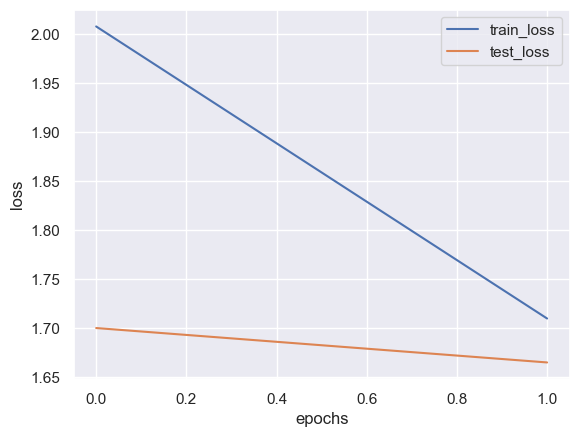

In [ ]:
df= pd.read_csv('history_1_.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 13632s 44s/step - loss: 1.4776 - f_beta_score: 0.1826 - val_loss: 1.2959 - val_f_beta_score: 0.2324
Epoch 2/2
311/311 [==============================] - 14476s 47s/step - loss: 1.2592 - f_beta_score: 0.2195 - val_loss: 1.2419 - val_f_beta_score: 0.2420


In [ ]:
model.load_weights('weights_1_1.h5')

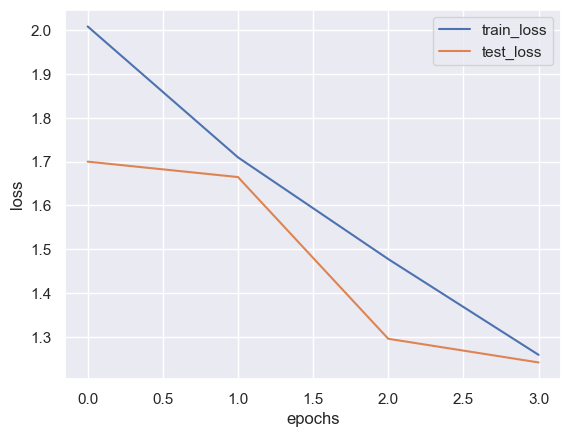

In [ ]:
df= pd.read_csv('history_1_.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 12862s 41s/step - loss: 1.0585 - f_beta_score: 0.2610 - val_loss: 0.9835 - val_f_beta_score: 0.2699
Epoch 2/2
311/311 [==============================] - 12849s 41s/step - loss: 0.8742 - f_beta_score: 0.3171 - val_loss: 0.9013 - val_f_beta_score: 0.3347


In [ ]:
model.load_weights('weights_1_1.h5')

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 13705s 44s/step - loss: 0.7090 - f_beta_score: 0.3800 - val_loss: 0.7194 - val_f_beta_score: 0.3991
Epoch 2/2
311/311 [==============================] - 13407s 43s/step - loss: 0.5654 - f_beta_score: 0.4507 - val_loss: 0.6553 - val_f_beta_score: 0.4262


In [ ]:
model.load_weights('weights_1_1.h5')

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 2,
          callbacks = [early_stopping,tensorboard_cb, save_model])

Epoch 1/2
311/311 [==============================] - 13251s 43s/step - loss: 0.4509 - f_beta_score: 0.5132 - val_loss: 0.4511 - val_f_beta_score: 0.4833
Epoch 2/2
311/311 [==============================] - 12775s 41s/step - loss: 0.3568 - f_beta_score: 0.5683 - val_loss: 0.3196 - val_f_beta_score: 0.5674


In [ ]:
model.load_weights('weights_1_1.h5')

In [ ]:
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 1,
          callbacks = [early_stopping,tensorboard_cb, save_model])

311/311 [==============================] - 13266s 42s/step - loss: 0.2776 - f_beta_score: 0.6112 - val_loss: 0.3596 - val_f_beta_score: 0.5515


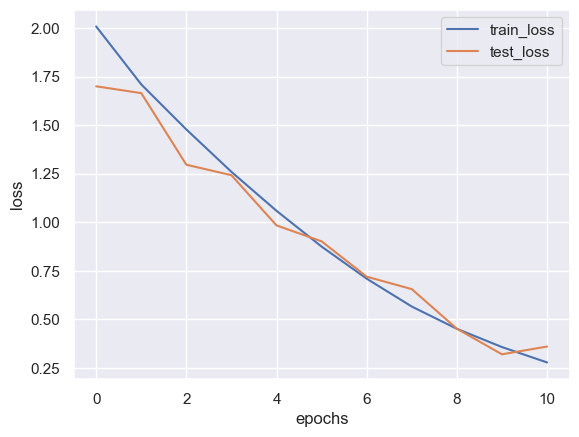

In [ ]:
df= pd.read_csv('history_1_.csv')
plt.plot(range(0, len(df['loss'])), df['loss'], label = 'train_loss')
plt.plot(range(0, len(df['val_loss'])), df['val_loss'], label = 'test_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [258]:
def input_processor(input_sentence, pad_seq):

    encoder_input = preprocess(input_sentence, add_start_token=True, add_end_token=True)

    tokenized_text = tokenizer.texts_to_sequences([encoder_input])
    if pad_seq == True:
        tokenized_text = pad_sequences(
            tokenized_text, maxlen=INPUT_ENCODER_LENGTH, padding="post"
        )

    tokenized_text = tf.convert_to_tensor(tokenized_text, dtype=tf.float32)
    return tokenized_text


def remove_end_token(words):
    words_list = words.split(" ")[:-1]
    words = " ".join(words_list)
    return words

In [259]:
def plot_attention(AW, IN, OUT):
    print(IN)
    print(OUT)
    plt.figure(figsize=(8, 6))
    sns.set_theme()
    ax = sns.heatmap(AW, xticklabels=IN.split(" "), yticklabels=OUT.split(" "))
    ax.set_title("Attention weights")
    ax.set_xlabel("encoder_input")
    ax.set_ylabel("decoder_output")

In [260]:
def predict(input_sentence):

    input = input_processor(input_sentence, pad_seq=False)

    NUMBER_OF_INPUTS = input.shape[0]

    states = model.layers[0].initialize_states(NUMBER_OF_INPUTS)

    encoder_output, encoder_final_state_h, encoder_final_state_c = model.layers[0](
        input, states
    )

    input_decoder = np.zeros((1, 1))
    input_decoder[0][0] = 2

    attention_wts = []
    decoder_output_list = []

    stop = False

    while stop != True:
        (
            decoder_output,
            decoder_state_h,
            decoder_state_c,
            attention_weights,
            context_vector,
        ) = model.layers[1].one_step_decoder(
            input_decoder, encoder_output, encoder_final_state_h, encoder_final_state_c
        )

        encoder_final_state_h = decoder_state_h
        encoder_final_state_c = decoder_state_c

        index = np.argmax(decoder_output, -1)
        attention_wts.append(attention_weights)
        decoder_output_list.append(index)

        input_decoder = np.asarray(index, dtype=np.float32)
        input_decoder = np.reshape(input_decoder, (NUMBER_OF_INPUTS, 1))

        if input_decoder[0][0] == 4 or len(decoder_output_list) > input.shape[1]:
            stop = True

    arr_out = [int(np.asarray(i)) for i in decoder_output_list]

    output_words = out_tokenizer.sequences_to_texts([arr_out])

    return output_words, attention_wts

In [261]:
def translate(sent, ind, plot_attention_):
    out, attention_weights = predict(sent)

    OUT = out[0]
    IN = encoder_input[ind]

    if plot_attention_ == True:
        attention_weights = np.asarray(attention_weights)
        AW = np.reshape(
            attention_weights, (attention_weights.shape[0], attention_weights.shape[2])
        )
        plot_attention(AW, IN, OUT)

    return OUT

<start> When you are go smoothly , you have to be more modest . <end>
when you are going smoothly , you have to be more modest . <end>


'when you are going smoothly , you have to be more modest . <end>'

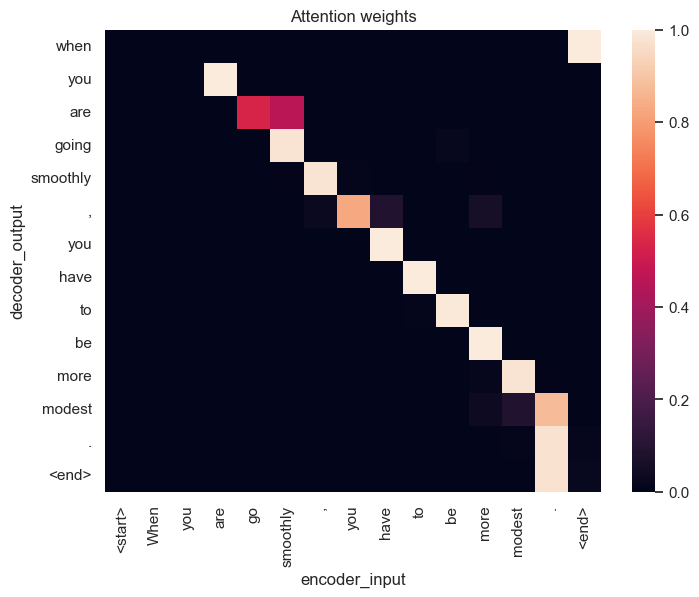

In [ ]:
translate(data["error"].loc[5], 5, plot_attention_=True)

<start> But I can study English through this . <end>
but i can study english from it . <end>


'but i can study english from it . <end>'

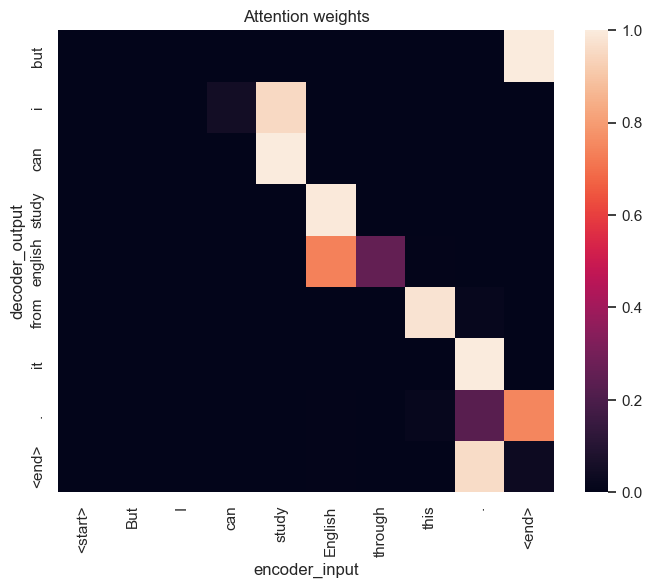

In [ ]:
translate(data["error"].loc[30], 30, plot_attention_=True)

<start> You know , you can take them at slot machine . <end>
you know , you can leave them on a slot machine . <end>


'you know , you can leave them on a slot machine . <end>'

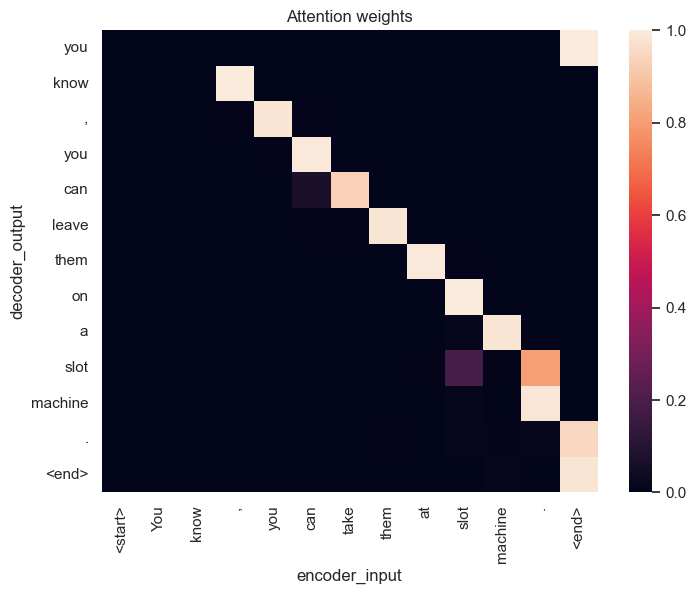

In [ ]:
translate(data["error"].loc[7], 7, plot_attention_=True)

<start> If only I had black dense curtains . <end>
even only had a black curtains curtains . <end>


'even only had a black curtains curtains . <end>'

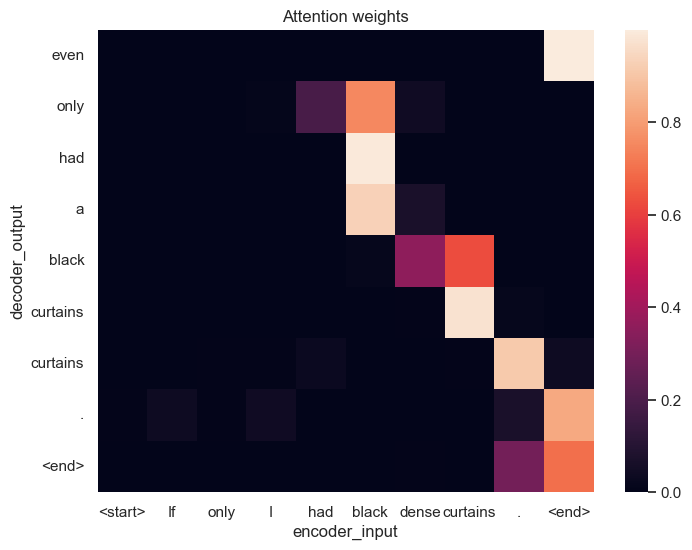

In [ ]:
translate(data["error"].loc[11], 11, plot_attention_=True)

# T5 (text-to-text tranfer transformer)

In [1]:
!pip install transformers datasets evaluate nltk pandas tensorflow gdown

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
# تحميل المكتبات
import os
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense
from tensorflow.keras.models import Model
from transformers import T5ForConditionalGeneration, T5Tokenizer, Seq2SeqTrainingArguments, Seq2SeqTrainer
from datasets import Dataset
import evaluate
import nltk
import gdown

d:\MyFiles\My University\Fifth Year\First Semester\NLP\مشروع\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
data = pd.read_csv("cleaned2.csv")

In [5]:
data = data.rename(columns={"correct": "target", "error": "input"}).drop(columns=["identified_errors"])

In [6]:
data[:2]

,target,input
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
1,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang - was him ."


In [7]:
data.describe()

,target,input
count,287054,287054
unique,284503,286257
top,I am looking forward to it .,"Today , I start Lang - ."
freq,23,5


In [8]:
data = data[:200000]
data.reset_index()

,index,target,input
0,0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
1,1,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang - was him ."
2,2,His Kanji ability is much better than mine .,His Kanji is ability is much better than me .
3,3,I heard a sentence last night when I was watch...,I heard a sentence last night when I watched TV .
4,4,"When you go uphill , you have to bend your back .","When you go uphill , you hvae to bend your back ."
...,...,...,...
199995,199995,"Even though I am Japanese , I like better brea...","Although I am Japanese , but I like better bre..."
199996,199996,These breads are very expensive !,These berad are very expensive !
199997,199997,That is whyI have made bread the third time th...,"That is why , I have made bread third a week ."
199998,199998,"I make bread without the fat , so it is healthy .","I make bread without fat , so healthy ."


In [9]:
data.describe()

,target,input
count,200000,200000
unique,198494,199534
top,I am looking forward to it .,This is my first diary .
freq,20,4


In [10]:
data[:2]

,target,input
0,And he took in my favorite subjects like soccer .,And he took in my favorite subject like soccer .
1,"Actually , he was the one who let me know abou...","Actually , who let me know about Lang - was him ."


In [11]:
# تقسيم البيانات
train_df, test_df = train_test_split(data, test_size=0.1, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [12]:
train_df[:2]

,target,input
93831,"Certainly , both creativity and being artistic...","Certainly , both creative minds and artistic m..."
89511,"even now , at pm I feel a little bit sick , si...","even now pm I feel a little bit sick , sigh ."


In [13]:
test_df[:2]

,target,input
119737,I am glad to correct my English sentences .,I am glad to right my English sentences .
72272,And there were many foreigners who came to wat...,and there were many Foreigner came and saw them .


In [14]:
val_df[:2]

,target,input
189800,I have never seen so much snow falling around ...,I have never seen such a lot of snow falling a...
78294,I like cooking and eating food .,I like cooking and eat to foods .


In [21]:
# تحويل البيانات إلى تنسيق Hugging Face Dataset للنموذج T5
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(val_df)
test_dataset = Dataset.from_pandas(test_df)

# تحميل نموذج T5 والتوكينيزر
model_name = "t5-base"
tokenizer_t5 = T5Tokenizer.from_pretrained(model_name)
model_t5 = T5ForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [22]:
# تحويل النصوص إلى تنسيق T5
def preprocess_function(examples):
    inputs = [f"correct: alli sjansn ascnac aschkajsc hascj]
    targets = examples['target']
    model_inputs = tokenizer_t5(inputs, max_length=64, truncation=True, padding='max_length')
    labels = tokenizer_t5(targets, max_length=64, truncation=True, padding='max_length')
    model_inputs['labels'] = labels['input_ids']
    return model_inputs

train_dataset = train_dataset.map(preprocess_function, batched=True)
val_dataset = val_dataset.map(preprocess_function, batched=True)
test_dataset = test_dataset.map(preprocess_function, batched=True)


Map:   0%|          | 0/162000 [00:00<?, ? examples/s]

Map:   0%|          | 0/18000 [00:00<?, ? examples/s]

Map:   0%|          | 0/20000 [00:00<?, ? examples/s]

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
# تدريب أو تحميل نموذج T5
 # use b8682b64aafbfe0d2342a697524c91b3b1f0433a for api key - :) ali saifo
if os.path.exists("/content/drive/MyDrive/nlp/t5_gec_model"):
    model_t5 = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    tokenizer_t5 = T5Tokenizer.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    print("تم تحميل نموذج T5 من مجلد /content/drive/MyDrive/nlp/t5_gec_model")
else:
    print("بدء تدريب نموذج T5...")
    training_args = Seq2SeqTrainingArguments(
                      output_dir="./results",
                      evaluation_strategy="steps",
                      per_device_train_batch_size=16,
                      per_device_eval_batch_size=16,
                      learning_rate=2e-5,
                      num_train_epochs=1,
                      weight_decay=0.01,
                      save_total_limit=2,
                      predict_with_generate=True,
                      fp16=True,
                      gradient_accumulation_steps=6,
                      eval_steps=250,
                      save_steps=250,
                      load_best_model_at_end=True,
                      logging_dir="/logs",
                      report_to="wandb",
                  )

    trainer = Seq2SeqTrainer(
        model=model_t5,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer_t5,
    )

    trainer.train()
    model_t5.save_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    tokenizer_t5.save_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
    print("تم حفظ نموذج T5 في مجلد /content/drive/MyDrive/nlp/t5_gec_model")


بدء تدريب نموذج T5...


/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-24-e3593b320428>:28: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Seq2SeqTrainer.__init__`. Use `processing_class` instead.
  trainer = Seq2SeqTrainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Step,Training Loss,Validation Loss
250,No log,0.152502
500,4.205500,0.143359
750,4.205500,0.140236
1000,0.931600,0.138123
1250,0.931600,0.137179
1500,0.914300,0.136610


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


تم حفظ نموذج T5 في مجلد /content/drive/MyDrive/nlp/t5_gec_model


In [25]:
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration


model = T5ForConditionalGeneration.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
tokenizer = T5Tokenizer.from_pretrained("/content/drive/MyDrive/nlp/t5_gec_model")
torch_device = 'cpu'

In [26]:
def correct_grammar(input_text,num_return_sequences):
  batch = tokenizer([input_text],truncation=True,padding='max_length',max_length=64, return_tensors="pt").to(torch_device)
  translated = model.generate(**batch,max_length=64,num_beams=4, num_return_sequences=num_return_sequences, temperature=1.5)
  tgt_text = tokenizer.batch_decode(translated, skip_special_tokens=True)
  return tgt_text

In [27]:
text = 'I want to school at Sunday.'
print(correct_grammar(text, num_return_sequences=1))

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `1.5` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


['I want to go to school on Sunday.']


In [28]:
text = 'Alex and Kosai is come to ma wedding.'
print(correct_grammar(text, num_return_sequences=1))

['Alex and Kosai are coming to my wedding .']


In [29]:
text = 'She is more taller.'
print(correct_grammar(text, num_return_sequences=1))

['She is taller.']


In [30]:
text = 'He is guy.'
print(correct_grammar(text, num_return_sequences=1))

['He is a guy.']


In [32]:
pip install tqdm

In [33]:
from torch.utils.data import DataLoader
from evaluate import load
from nltk.translate.gleu_score import sentence_gleu
import torch
from tqdm import tqdm
import time

# Function to compute GLEU
def compute_gleu(predictions, references):
    scores = [sentence_gleu([ref.split()], pred.split()) for ref, pred in zip(references, predictions)]
    return sum(scores) / len(scores)

# Function to compute ROUGE
def compute_rouge(predictions, references):
    rouge = load("rouge")
    result = rouge.compute(predictions=predictions, references=references)
    return result

# Generate predictions with progress bar
def generate_predictions(model, tokenizer, dataloader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    predictions, references = [], []
    total_batches = len(dataloader)
    start_time = time.time()

    with tqdm(total=total_batches, desc="Generating Predictions") as pbar:
        for batch in dataloader:
            inputs = tokenizer(batch['input'], return_tensors="pt", truncation=True, padding=True, max_length=64)
            inputs = {key: value.to(device) for key, value in inputs.items()}

            # Generate outputs for the batch
            outputs = model.generate(inputs["input_ids"], max_length=64, num_beams=2)
            decoded_preds = [tokenizer.decode(o, skip_special_tokens=True) for o in outputs]

            predictions.extend(decoded_preds)
            references.extend(batch['target'])

            # Update progress bar
            pbar.update(1)

    total_time = time.time() - start_time
    print(f"Prediction completed in {total_time / 60:.2f} minutes.")
    return predictions, references

# Evaluate the model
print("Evaluating the model...")
test_dataloader = DataLoader(test_dataset, batch_size=16)  # Batch processing
predictions, references = generate_predictions(model_t5, tokenizer_t5, test_dataloader)
gleu_score = compute_gleu(predictions, references)
rouge_scores = compute_rouge(predictions, references)

print(f"GLEU Score: {gleu_score}")
print(f"ROUGE Scores: {rouge_scores}")


Evaluating the model...


Generating Predictions: 100%|██████████| 1250/1250 [24:42<00:00,  1.19s/it]


Prediction completed in 24.70 minutes.


ImportError: To be able to use evaluate-metric/rouge, you need to install the following dependencies['rouge_score'] using 'pip install rouge_score' for instance'

In [34]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=b0908e87a732bbe8e0ac9dacc2abd45a94e3dc4a6869d9feb334b9c764c8dbc6
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [35]:
gleu_score = compute_gleu(predictions, references)
rouge_scores = compute_rouge(predictions, references)

print(f"GLEU Score: {gleu_score}")
print(f"ROUGE Scores: {rouge_scores}")

GLEU Score: 0.575149739439773
ROUGE Scores: {'rouge1': 0.8043869607997454, 'rouge2': 0.633349645144037, 'rougeL': 0.7918098192007212, 'rougeLsum': 0.7918229236944632}
